In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import KFold, cross_val_score


In [5]:
df = pd.read_csv("data/data.csv")

In [6]:
df.shape

(689, 16)

In [7]:
df.dtypes


b         object
30.83     object
0        float64
u         object
g         object
w         object
v         object
1.25     float64
t         object
t.1       object
01         int64
f         object
g.1       object
00202     object
0.1        int64
+         object
dtype: object

In [8]:
columns = df.columns
for column in columns:
    try:
        f_val = float(str(df[column][0]).replace(',','.'))
        if type(f_val) is float:
            df[column] = df[column].apply(lambda x: float(str(x).replace(',','.')))
    except Exception as e:
        pass

In [9]:
df.head(10)


,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.040,t,t,6.0,f,g,00043,560.0,+
1,a,24.50,0.500,u,g,q,h,1.500,t,f,0.0,f,g,00280,824.0,+
2,b,27.83,1.540,u,g,w,v,3.750,t,t,5.0,t,g,00100,3.0,+
3,b,20.17,5.625,u,g,w,v,1.710,t,f,0.0,f,s,00120,0.0,+
4,b,32.08,4.000,u,g,m,v,2.500,t,f,0.0,t,g,00360,0.0,+
5,b,33.17,1.040,u,g,r,h,6.500,t,f,0.0,t,g,00164,31285.0,+
6,a,22.92,11.585,u,g,cc,v,0.040,t,f,0.0,f,g,00080,1349.0,+
7,b,54.42,0.500,y,p,k,h,3.960,t,f,0.0,f,g,00180,314.0,+
8,b,42.50,4.915,y,p,w,v,3.165,t,f,0.0,t,g,00052,1442.0,+
9,b,22.08,0.830,u,g,c,h,2.165,f,f,0.0,t,g,00128,0.0,+


In [10]:
df['b'].value_counts()

b    467
a    210
?     12
Name: b, dtype: int64

In [11]:
df['g'].value_counts()

g     518
p     163
?       6
gg      2
Name: g, dtype: int64

In [12]:
df.columns[df.isin(['?']).any()]

Index([u'b', u'30.83', u'u', u'g', u'w', u'v', u'00202'], dtype='object')

In [13]:
df2 = df.replace('?', np.nan)
df2.head(10)

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.040,t,t,6.0,f,g,00043,560.0,+
1,a,24.50,0.500,u,g,q,h,1.500,t,f,0.0,f,g,00280,824.0,+
2,b,27.83,1.540,u,g,w,v,3.750,t,t,5.0,t,g,00100,3.0,+
3,b,20.17,5.625,u,g,w,v,1.710,t,f,0.0,f,s,00120,0.0,+
4,b,32.08,4.000,u,g,m,v,2.500,t,f,0.0,t,g,00360,0.0,+
5,b,33.17,1.040,u,g,r,h,6.500,t,f,0.0,t,g,00164,31285.0,+
6,a,22.92,11.585,u,g,cc,v,0.040,t,f,0.0,f,g,00080,1349.0,+
7,b,54.42,0.500,y,p,k,h,3.960,t,f,0.0,f,g,00180,314.0,+
8,b,42.50,4.915,y,p,w,v,3.165,t,f,0.0,t,g,00052,1442.0,+
9,b,22.08,0.830,u,g,c,h,2.165,f,f,0.0,t,g,00128,0.0,+


In [14]:
all_nan_cols = df2.columns[df2.isna().any()]
all_nan_cols

Index([u'b', u'30.83', u'u', u'g', u'w', u'v', u'00202'], dtype='object')

In [15]:
df3 = df2.apply(lambda x:x.fillna(x.value_counts().idxmax()))
df3.head(10)

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.040,t,t,6.0,f,g,00043,560.0,+
1,a,24.50,0.500,u,g,q,h,1.500,t,f,0.0,f,g,00280,824.0,+
2,b,27.83,1.540,u,g,w,v,3.750,t,t,5.0,t,g,00100,3.0,+
3,b,20.17,5.625,u,g,w,v,1.710,t,f,0.0,f,s,00120,0.0,+
4,b,32.08,4.000,u,g,m,v,2.500,t,f,0.0,t,g,00360,0.0,+
5,b,33.17,1.040,u,g,r,h,6.500,t,f,0.0,t,g,00164,31285.0,+
6,a,22.92,11.585,u,g,cc,v,0.040,t,f,0.0,f,g,00080,1349.0,+
7,b,54.42,0.500,y,p,k,h,3.960,t,f,0.0,f,g,00180,314.0,+
8,b,42.50,4.915,y,p,w,v,3.165,t,f,0.0,t,g,00052,1442.0,+
9,b,22.08,0.830,u,g,c,h,2.165,f,f,0.0,t,g,00128,0.0,+


In [16]:
df3['b'].value_counts()


b    479
a    210
Name: b, dtype: int64

In [17]:
df3['g'].value_counts()

g     524
p     163
gg      2
Name: g, dtype: int64

In [18]:
df3 = df3.replace('gg', 'g')

In [19]:
df3['g'].value_counts()

g    526
p    163
Name: g, dtype: int64

In [20]:
df3.head()

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,00043,560.0,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,00280,824.0,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,00100,3.0,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,00120,0.0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0.0,t,g,00360,0.0,+


In [21]:
df3['30.83'] = df3['30.83'].astype('float')
df3['00202'] = df3['00202'].astype('int')

In [22]:
df_num=df3.select_dtypes(include=[np.number])
df_num.head(5)


,30.83,0,1.25,01,00202,0.1
0,58.67,4.460,3.04,6.0,43,560.0
1,24.50,0.500,1.50,0.0,280,824.0
2,27.83,1.540,3.75,5.0,100,3.0
3,20.17,5.625,1.71,0.0,120,0.0
4,32.08,4.000,2.50,0.0,360,0.0


In [23]:
df4 = df3.select_dtypes(include=['object'])
df4.head(5)

,b,u,g,w,v,t,t.1,f,g.1,+
0,a,u,g,q,h,t,t,f,g,+
1,a,u,g,q,h,t,f,f,g,+
2,b,u,g,w,v,t,t,t,g,+
3,b,u,g,w,v,t,f,f,s,+
4,b,u,g,m,v,t,f,t,g,+


In [24]:
categorical = df4.dtypes[df4.dtypes == "object"].index
categorical

Index([u'b', u'u', u'g', u'w', u'v', u't', u't.1', u'f', u'g.1', u'+'], dtype='object')

In [25]:
df_cpy = df4.copy()
for c in categorical:
    df_cpy[c] = df_cpy[c].astype('category')
    df_cpy[c] = df_cpy[c].cat.codes
df_cpy.head(10)

,b,u,g,w,v,t,t.1,f,g.1,+
0,0,1,0,10,3,1,1,0,0,0
1,0,1,0,10,3,1,0,0,0,0
2,1,1,0,12,7,1,1,1,0,0
3,1,1,0,12,7,1,0,0,2,0
4,1,1,0,9,7,1,0,1,0,0
5,1,1,0,11,3,1,0,1,0,0
6,0,1,0,2,7,1,0,0,0,0
7,1,2,1,8,3,1,0,0,0,0
8,1,2,1,12,7,1,0,1,0,0
9,1,1,0,1,3,0,0,1,0,0


In [26]:
df5 = pd.concat([df_num, df_cpy], axis=1)
df5.head(10)

,30.83,0,1.25,01,00202,0.1,b,u,g,w,v,t,t.1,f,g.1,+
0,58.67,4.460,3.040,6.0,43,560.0,0,1,0,10,3,1,1,0,0,0
1,24.50,0.500,1.500,0.0,280,824.0,0,1,0,10,3,1,0,0,0,0
2,27.83,1.540,3.750,5.0,100,3.0,1,1,0,12,7,1,1,1,0,0
3,20.17,5.625,1.710,0.0,120,0.0,1,1,0,12,7,1,0,0,2,0
4,32.08,4.000,2.500,0.0,360,0.0,1,1,0,9,7,1,0,1,0,0
5,33.17,1.040,6.500,0.0,164,31285.0,1,1,0,11,3,1,0,1,0,0
6,22.92,11.585,0.040,0.0,80,1349.0,0,1,0,2,7,1,0,0,0,0
7,54.42,0.500,3.960,0.0,180,314.0,1,2,1,8,3,1,0,0,0,0
8,42.50,4.915,3.165,0.0,52,1442.0,1,2,1,12,7,1,0,1,0,0
9,22.08,0.830,2.165,0.0,128,0.0,1,1,0,1,3,0,0,1,0,0


In [27]:
x = df5.drop("+", axis=1)
y = df5["+"]

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True, test_size=0.20)
x_train.shape,  y_train.shape, x_test.shape, y_test.shape


((551, 15), (551,), (138, 15), (138,))

In [29]:
scaler = StandardScaler()
scaler.fit(x_train)
X_train = scaler.transform(x_train)
pca = PCA(0.95)
pca.fit(X_train)
print (pca.n_components_)
X_train = pca.transform(X_train)
X_train = pd.DataFrame(X_train)


scaler.fit(x_test)
X_test = scaler.transform(x_test)
X_test = pca.transform(X_test)
X_test= pd.DataFrame(X_test)

13


In [30]:
X_train.shape, X_test.shape

((551, 13), (138, 13))

In [31]:
random_forest = RandomForestClassifier(n_estimators=50)
random_forest.fit(x_train, y_train)
Y_pred = random_forest.predict(x_test)
acc_random_forest = round(accuracy_score(y_test,Y_pred) * 100, 1)
acc_random_forest

87.7

In [32]:
from random import randint

param_dist = {"n_estimators": [20, 150],"max_depth": ["auto"],"max_features": ["auto"],"min_samples_leaf": ["1"],"bootstrap": [True],"criterion": ["gini", "entropy"]}
acc_param_dist = round(accuracy_score(y_test,Y_pred) * 100, 2)
acc_param_dist

87.68

In [33]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(accuracy_score(y_test,Y_pred) * 100, 2)
acc_knn

84.78

In [34]:
neighbors = filter(lambda x: x % 2 == 0, list(range(1,50)))
cv_scores = {}
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='recall')
    cv_scores[k] = scores.mean()

In [35]:
optimal_k = max(cv_scores, key=lambda k: cv_scores[k])
optimal_k

48

In [36]:
# instantiate learning model (k = 48)
knn = KNeighborsClassifier(n_neighbors=optimal_k)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
acc_knn2 = round(accuracy_score(y_test,Y_pred) * 100, 2)
acc_knn2

84.78

In [37]:
models = pd.DataFrame({
    'Model': ['Random Forest Classifier', 'RandomizedSearchCV', 'KNN (Fixed)', 'KNN (Optial)'],
    'Score': [acc_random_forest, acc_param_dist, acc_knn, 
              acc_knn2]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Random Forest Classifier,87.70
1,RandomizedSearchCV,87.68
2,KNN (Fixed),84.78
3,KNN (Optial),84.78


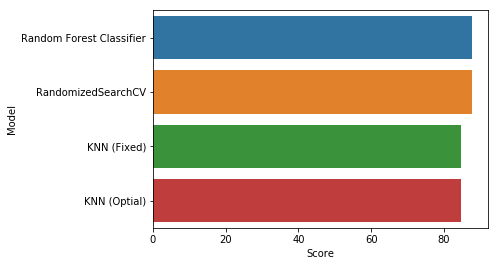

In [38]:
sns.barplot(x='Score', y='Model', data=models)